
Notebook

In [1]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display

nlp = spacy.load("en_core_web_sm")

file_path = "books/Shakespeare/much-ado-text.txt"
with open(file_path, "r") as file:
    text = file.read()

doc = nlp(text)

filtered_tokens = []
for token in doc:
    if not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
        filtered_tokens.append(token.lemma_)


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# The slider controls the number of words to display
slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Slider:')
display(slider)

IntSlider(value=10, description='Slider:', min=1)

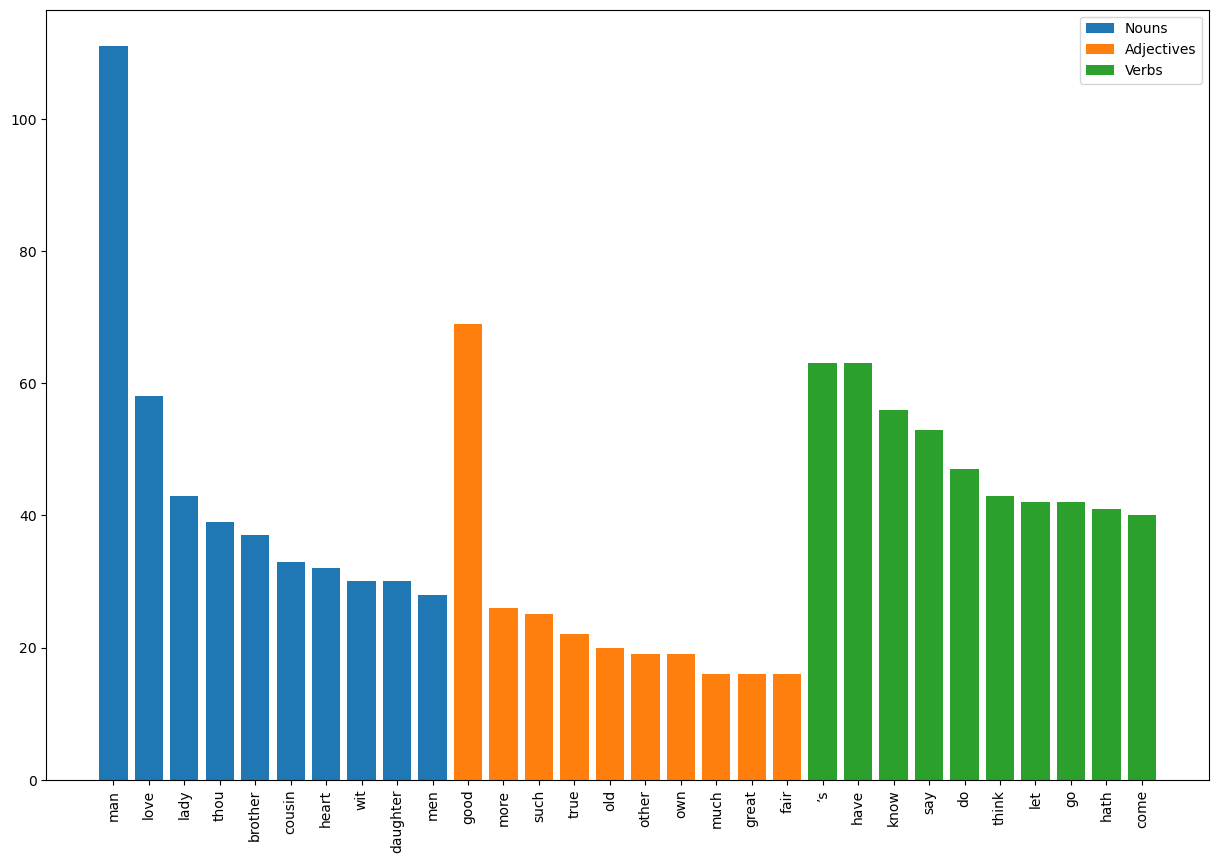

In [ ]:
nouns = []
adjectives = []
verbs = []

for token in doc:
    if token.pos_ == "NOUN":
        nouns.append(token.text)
    elif token.pos_ == "ADJ":
        adjectives.append(token.text)
    elif token.pos_ == "VERB":
        verbs.append(token.text)

nouns_fd = Counter(nouns)
adjectives_fd = Counter(adjectives)
verbs_fd = Counter(verbs)

nouns_30 = nouns_fd.most_common(slider.value)
adjectives_30 = adjectives_fd.most_common(slider.value)
verbs_30 = verbs_fd.most_common(slider.value)

nouns_30_words = []
adjectives_30_words = []
verbs_30_words = []

for word, freq in nouns_30:
    nouns_30_words.append(word)

for word, freq in adjectives_30:
    adjectives_30_words.append(word)

for word, freq in verbs_30:
    verbs_30_words.append(word)

nouns_30_freq = []
adjectives_30_freq = []
verbs_30_freq = []

for word, freq in nouns_30:
    nouns_30_freq.append(freq)

for word, freq in adjectives_30:
    adjectives_30_freq.append(freq)

for word, freq in verbs_30:
    verbs_30_freq.append(freq)

plt.figure(figsize=(15, 10))  # sets the figure size to x inches by y inches
plt.bar(nouns_30_words, nouns_30_freq, label="Nouns")
plt.bar(adjectives_30_words, adjectives_30_freq, label="Adjectives")
plt.bar(verbs_30_words, verbs_30_freq, label="Verbs")
plt.xticks(rotation=90)
plt.legend()
plt.show()